In [6]:
import urllib.request
import json
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from datetime import datetime
from datetime import date
import re

In [7]:
# params
url = 'https://api.vk.com/method/'
methodWallGet = 'wall.get?'
owner_id = '-145800770'
posts_count = '100'

methodWallGetComments = 'wall.getComments?'

version = '5.95'
token = '8423c2448423c2448423c244d08441f2a1884238423c244dee' \
        '1644d9e90529494134bf8'

In [8]:
def getGroupPosts():
    offset = 0;
    posts = []
    print('trying to get all posts')

    while offset < 200:
        requestURL = url + methodWallGet + 'owner_id=' + owner_id + \
                     '&offset=' + str(offset) + '&count=' + \
                     posts_count + '&v=' + version + '&access_token=' + token

        req = urllib.request.Request(requestURL)
        response = urllib.request.urlopen(req)
        result = response.read().decode('utf-8')
        data = json.loads(result)
        if data['response']['items']:
            for post_info in data['response']['items']:
                if post_info['text'] == '':
                    try:
                        if post_info['comments']['count'] == 0:
                            posts.append({'id': post_info['id'],
                                          'date': post_info['date'],
                                          'text': post_info
                                          ['copy_history'][0]['text'],
                                          'comments': False})
                        else:
                            posts.append({'id': post_info['id'],
                                          'date': post_info['date'],
                                          'text': post_info
                                          ['copy_history'][0]['text'],
                                          'comments': True})
                    except:
                        pass
                else:
                    if post_info['comments']['count'] == 0:
                        posts.append({'id': post_info['id'],
                                      'date': post_info['date'],
                                      'text': post_info['text'],
                                      'comments': False})
                    else:
                        posts.append({'id': post_info['id'],
                                      'date': post_info['date'],
                                      'text': post_info['text'],
                                      'comments': True})
        else:
            break
        offset += 100
    return posts

In [9]:
def getFromFile(name):
    with open(name + '.txt', 'r', ) as file:
        result = file.read()
    return result

In [10]:
def getComments(post_id):
    offset = 0
    comments = []
    i = 0
    print('trying to get all comments')

    while True:
        requestURL = url + methodWallGetComments + 'owner_id=' + \
                     owner_id + '&post_id=' + \
                     str(post_id) + '&offset=' + str(offset) + '&v=' + \
                     version + '&access_token=' + token + \
                     '&extended=1&fields=id,city,bdate,sex' + '&count=100'

        req = urllib.request.Request(requestURL)
        response = urllib.request.urlopen(req)
        result = response.read().decode('utf-8')
        data = json.loads(result)
        start = i
        if data['response']['profiles']:
            for profile in data['response']['profiles']:
                comments.append({})
                comments[i]['id'] = profile['id']
                try:
                    comments[i]['sex'] = profile['sex']
                except:
                    pass
                try:
                    comments[i]['bdate'] = profile['bdate']
                except:
                    pass
                try:
                    comments[i]['city'] = profile['city']['title']
                except:
                    pass
                i += 1

            offset += 100
        else:
            break

        new = []
        comlist = data['response']['items']
        for item in comlist:
            try:
                new.append({'id': item['from_id'],
                            'text': item['text']})
            except:
                pass
        new = sorted(new, key=lambda k: k['id'])
        for user_comment in new:
            try:
                if (comments[start]['id'] == user_comment['id']):
                    comments[start]['text'] = user_comment['text']
                else:
                    continue
            except:
                continue
            if (start < i - 1):
                start += 1
    return comments

In [36]:
def calculateAge(birthDate):
    today = datetime.today()
    age = today.year - birthDate.year - ((today.month, today.day) <
                                         (birthDate.month, birthDate.day))
    return age

In [12]:
def main():
    posts = getGroupPosts()
    print(json.dumps(posts, indent=4, sort_keys=True))
    print('length = ' + str(len(posts)))
    with open('wallDataVdudTest.txt', 'w', encoding="utf-8") as file:
        file.write(json.dumps(posts, indent=4, sort_keys=True))
    
    comments = []
    i = 1
    for post in posts:
        print('current post = ' + str(i) + ' of ' + str(len(posts)))
        if post['comments']:
            post['comments'] = getComments(post['id'])
        i += 1
    
    
    with open('commentsDataVdudTest.txt', 'w', encoding="utf-8") as file:
        file.write(json.dumps(posts, indent=4, sort_keys=True))

In [16]:
    # в последствии будем брать из файла, потому что стоит ограничение на токен
    posts = getFromFile('wallDataVdudTest')
    posts = json.loads(posts)
    print(getComments(163702))

trying to get all comments
[{'id': 158767, 'sex': 2, 'bdate': '30.4.1986', 'city': 'Saint Petersburg', 'text': 'Буду немногословным.\nПравда Юра, это Смело.'}, {'id': 300573, 'sex': 2, 'bdate': '13.1', 'city': 'Saint Petersburg', 'text': 'За выпуск спасибо. Но пожалуйста, делайте анонс выхода следующего выпуска, и тогда к вам никаких вопросов и претензий.'}, {'id': 326602, 'sex': 2, 'city': 'Moscow', 'text': 'топ контент'}, {'id': 477117, 'sex': 1, 'bdate': '5.9', 'city': 'Samara', 'text': 'Спасибо. Сотню раз.'}, {'id': 1439729, 'sex': 2, 'bdate': '24.6', 'city': 'Saint Petersburg', 'text': 'Спасибо за выпуск. Коммунизм и сталинизм должны гореть в аду.'}, {'id': 1531633, 'sex': 2, 'bdate': '26.12.1986', 'text': 'Охуеть!!! За выбор темы - сто тыщ лайков!'}, {'id': 1648697, 'sex': 2, 'text': 'Ты чё, на святое замахнулся, 70% же считают сталина благодетелем. А все остальное - вынужденная мера'}, {'id': 1796786, 'sex': 2, 'city': 'Moscow', 'text': 'Два часа, Карл! Теперь все видео материал

In [37]:
data = getFromFile('commentsDataVdudTest')
data = json.loads(data)
str = re.sub(r'[^А-Яа-я ]', '', data[0]['text'])

post_len = []
comment_len = []

age_and_len = []
city_and_len = []

posts_count_time = {'2019': 0,
                    '2018': 0,
                    '2017': 0}
for post in data:
    unixtime = post['date']
    utc = datetime.fromtimestamp(unixtime).strftime("%Y")
    posts_count_time[utc] += 1
    str = re.sub(r'[^А-Яа-я ]', '', post['text'])
    str = str.split(' ')
    post_len.append(len(str))
    com_len = 0
    for comments in post['comments']:
        str = re.sub(r'[^А-Яа-я ]', '', comments['text'])
        str = str.split(' ')
        com_len += len(str)

        # считаем длину для городов
        try:
            city_and_len.append({comments['city']: len(str)})
        except:
            pass
        # считаем возраст
        try:
            date_user = comments['bdate'].split('.')
            if len(date_user) == 3:
                ageee = calculateAge(date(int(date_user[2]),
                                          int(date_user[1]),
                                          int(date_user[0])))
                print(ageee)
                age_and_len.append({ageee: len(str)})
                
        except:
            pass

    comment_len.append(com_len / len(post['comments']))
    

32
32
26
33
58
32
38
33
24
29
28
41
23
25
29
25
29
28
20
105
27
24
23
26
36
44
24
35
20
20
25
23
38
32
36
32
31
28
45
35
29
16
32
30
47
39
26
23
27
18
23
41
47
31
25
26
21
38
25
27
23
34
34
56
27
108
39
18
28
29
24
25
29
27
27
26
33
26
28
58
37
37
28
34
29
28
29
27
27
25
30
21
25
25
26
25
19
26
34
23
19
39
30
23
25
21
23
29
33
28
24
31
39
30
73
37
28
33
33
32
27
35
36
33
27
25
37
25
29
30
25
23
27
29
26
46
58
23
40
28
46
47
27
27
38
28
38
25
16
23
18
14
23
20
28
91
39
33
33
35
25
53
27
30
26
31
28
44
23
23
24
27
32
18
37
37
40
66
51
55
47
25
13
32
21
25
42
38
19
52
30
31
32
35
34
30
28
34
30
29
15
29
30
36
39
41
38
28
30
26
18
31
27
36
25
27
32
45
19
26
117
46
20
38
77
37
29
31
107
31
32
35
32
32
58
18
36
57
44
33
20
27
25
37
50
34
36
31
33
34
30
49
28
27
22
31
17
29
31
26
25
29
26
37
30
34
117
14
22
28
16
27
32
55
35
35
36
35
28
34
31
31
41
30
29
30
31
32
28
32
33
24
28
19
114
27
22
38
23
19
99
21
32
25
14
26
19
15
15
13
27
34
40
32
35
31
23
25
22
27
45
29
33
41
30
27
30
25
31
57
17
3

27
34
30
27
26
31
21
29
36
20
27
25
27
17
23
39
27
29
23
31
24
31
28
14
33
21
42
15
25
37
30
39
25
52
20
26
18
19
22
30
28
26
33
20
29
29
27
20
27
22
23
20
29
22
29
18
31
20
21
33
101
24
27
26
31
30
28
14
19
21
25
19
88
21
32
24
29
27
32
28
44
51
41
32
34
35
15
24
28
27
28
34
29
41
26
32
27
21
24
22
26
27
22
34
24
31
20
31
27
41
16
56
29
20
26
30
19
36
39
40
32
25
24
28
32
28
27
74
23
28
33
25
26
20
44
18
40
25
30
21
22
30
20
32
23
27
33
22
19
100
33
31
29
34
34
33
28
23
38
29
24
23
31
35
13
26
36
14
46
28
30
19
21
28
23
26
51
37
22
30
21
37
21
29
32
32
30
30
28
36
27
29
25
25
27
22
23
32
21
29
29
16
24
29
24
31
31
30
26
18
22
23
22
19
17
35
15
19
58
16
19
31
98
46
23
29
28
22
25
80
14
35
14
29
39
34
32
28
33
32
34
29
24
34
32
24
28
31
22
25
31
23
28
33
95
24
26
25
31
32
32
18
15
26
32
26
15
58
38
27
29
30
32
39
40
30
40
33
29
26
29
27
29
26
28
32
23
35
19
24
27
29
33
23
25
25
29
44
31
19
31
30
26
23
46
20
31
26
24
29
31
20
27
37
58
28
35
33
32
29
31
30
35
28
37
32
28
33
42
24
31
30
30

40
28
32
27
32
35
28
29
30
29
39
33
35
42
24
25
23
29
37
33
26
18
29
18
26
23
42
31
18
36
23
19
38
31
16
25
19
40
19
45
24
23
29
32
35
33
26
33
29
27
29
21
45
21
27
31
22
22
16
19
25
31
30
32
24
27
31
29
32
35
34
32
32
33
22
32
30
32
26
25
25
30
32
31
30
29
44
27
22
22
31
31
36
23
28
55
25
41
23
36
30
32
31
41
26
30
17
31
24
25
25
35
35
35
34
17
19
18
21
18
27
18
116
30
18
19
27
25
22
31
28
42
28
40
29
27
35
22
18
33
25
22
16
54
30
35
28
29
28
33
24
24
30
26
21
24
23
21
25
22
24
20
27
34
32
36
27
29
116
33
19
32
35
33
28
26
23
34
26
24
47
27
26
24
37
25
32
99
27
19
27
28
28
34
18
28
24
17
20
20
26
29
33
26
22
25
29
31
31
38
28
32
30
30
34
28
28
22
29
29
21
23
19
27
36
25
18
29
117
21
32
34
19
30
21
44
46
28
17
32
38
20
24
29
31
35
35
38
48
26
36
34
26
29
35
19
19
26
98
40
30
31
27
44
36
33
24
32
23
25
37
26
31
31
24
37
26
16
29
34
26
35
20
24
34
27
30
117
26
18
26
23
23
19
23
19
14
37
28
32
18
26
31
19
29
30
29
34
36
26
28
29
27
30
117
34
38
74
19
28
32
33
37
23
42
33
101
28
31
39
33
1

31
28
29
30
35
40
27
32
23
23
28
31
35
31
30
26
30
44
27
30
30
20
36
29
39
32
22
32
28
27
26
38
31
28
26
30
24
34
28
28
29
25
36
37
35
21
34
24
40
26
19
38
30
29
22
28
35
31
28
31
33
31
29
30
30
29
19
27
26
32
55
31
22
32
29
31
29
41
31
27
20
18
22
32
30
30
35
26
30
32
32
31
26
28
26
26
27
27
29
30
23
31
16
30
15
101
18
31
101
24
22
35
17
26
28
20
27
28
15
28
29
24
22
23
42
26
50
22
27
20
31
24
22
28
27
18
30
30
30
33
26
26
29
24
25
23
30
31
21
26
40
26
33
25
28
32
29
27
31
29
32
40
65
28
21
30
19
31
20
79
23
24
34
27
15
18
30
29
27
35
28
28
15
29
24
29
22
26
21
65
31
26
27
24
20
21
31
22
19
23
30
26
35
35
101
33
24
23
24
30
21
30
18
29
35
19
36
25
30
15
26
36
21
25
27
21
27
27
31
20
23
22
22
22
25
32
20
30
21
26
37
19
25
22
26
26
24
24
22
31
58
28
21
22
19
56
23
16
27
28
23
25
23
22
20
30
32
27
29
27
99
27
43
19
31
16
24
27
28
28
21
21
32
44
28
27
61
27
56
28
28
16
50
28
32
37
25
32
33
24
32
27
25
29
29
29
25
22
25
27
30
25
61
32
20
36
39
44
35
21
31
30
21
39
31
24
29
33
15
27
29
22
2

18
26
19
25
30
28
28
22
19
23
20
19
17
21
18
62
27
33
33
18
25
33
18
15
22
16
79
24
36
35
29
24
28
33
27
24
26
28
25
18
99
23
26
30
40
18
18
19
14
17
20
25
17
27
27
21
19
26
38
28
17
23
14
27
26
16
14
14
33
32
30
23
15
24
29
30
32
25
23
26
19
40
24
25
21
23
24
24
24
22
20
35
22
24
20
21
21
116
15
32
27
28
17
22
24
34
41
23
29
33
34
30
27
33
31
34
27
37
30
25
24
32
38
27
30
27
30
28
37
28
29
27
33
19
26
17
21
22
28
18
24
26
17
22
36
29
19
25
49
36
31
25
33
39
34
36
28
28
25
28
23
28
25
28
23
22
16
21
20
19
18
23
25
33
23
17
17
26
41
20
18
27
66
19
29
42
34
19
22
25
39
34
23
32
26
20
21
24
20
30
24
22
32
20
19
20
18
18
19
31
15
23
18
25
101
19
18
112
26
15
38
28
30
21
25
40
29
36
33
26
29
24
25
26
31
31
29
28
38
22
24
19
24
22
22
22
19
44
33
24
17
25
23
20
23
24
18
19
24
22
30
30
29
40
28
30
25
28
39
27
29
35
31
25
22
28
18
28
32
32
24
27
33
23
27
22
115
112
20
22
18
26
21
78
32
33
19
24
27
17
34
31
30
27
21
29
31
30
31
23
24
22
30
26
21
21
21
26
18
58
24
18
18
19
18
20
31
21
19
18
20
18

34
16
23
29
33
31
26
25
28
26
20
44
24
27
25
31
41
30
31
101
40
56
28
33
27
16
28
32
34
33
40
46
33
37
27
44
101
29
26
28
29
26
19
26
25
34
23
102
25
30
58
27
64
32
32
40
34
38
25
29
27
35
31
44
22
21
20
27
18
16
38
21
17
17
18
18
16
102
22
32
34
30
38
44
30
30
22
20
20
29
24
18
18
26
27
17
17
48
38
30
49
18
32
33
44
27
18
21
24
31
31
20
32
17
26
27
29
39
31
30
25
31
27
44
26
24
20
28
24
31
22
100
21
22
29
23
34
32
27
26
44
29
26
24
30
27
20
20
18
20
16
20
23
19
19
49
30
27
114
29
32
33
17
28
33
26
34
20
32
37
30
28
30
34
31
29
18
24
21
25
22
24
24
17
25
101
17
31
18
21
31
18
27
33
19
40
20
27
33
15
34
29
24
26
25
109
26
34
21
25
20
25
27
24
21
18
24
44
21
20
22
17
17
24
15
20
24
17
27
27
19
25
97
20
18
24
29
94
15
30
15
31
35
24
24
24
35
36
20
25
27
20
18
26
22
21
25
20
26
16
18
79
23
18
16
97
25
24
30
34
36
31
34
31
39
24
36
27
31
29
25
19
22
28
29
21
20
19
26
19
22
19
116
25
24
18
23
28
20
19
25
79
18
21
19
25
24
20
23
101
22
33
35
35
27
34
27
27
26
31
19
18
29
36
22
27
22
25
20
18


21
29
24
39
19
21
20
23
22
31
27
100
16
16
29
25
19
21
105
94
26
22
35
40
19
25
29
30
24
22
22
19
26
27
25
31
27
46
19
26
19
89
24
96
33
27
25
22
20
34
36
27
19
32
30
34
30
23
30
30
28
23
21
26
27
25
19
29
28
26
24
27
27
21
19
18
18
29
26
32
38
29
33
30
15
29
27
30
30
23
21
27
30
16
21
23
26
24
20
31
35
47
35
35
65
26
17
27
26
22
21
32
36
33
30
41
31
33
26
32
25
27
29
28
29
28
24
23
29
31
29
23
20
20
38
63
31
28
35
32
38
98
31
29
34
28
32
28
30
26
35
32
24
37
23
24
117
30
32
26
17
48
18
25
29
31
21
29
36
33
20
25
46
22
30
34
30
36
27
28
28
34
28
27
26
32
33
35
24
22
20
21
32
28
26
22
29
28
19
32
22
28
25
30
26
26
17
26
37
37
44
33
33
28
31
27
28
31
33
57
32
32
25
27
22
22
19
34
30
20
22
22
31
18
27
19
32
46
29
26
31
41
29
38
35
45
27
22
25
20
30
29
29
28
25
28
40
78
18
30
29
21
26
19
19
28
27
27
49
48
21
38
29
115
16
34
32
30
34
28
25
25
26
25
30
27
35
22
31
20
20
116
79
26
33
21
28
26
28
22
25
106
28
36
33
30
28
36
45
30
35
26
31
32
22
40
31
32
19
20
36
26
16
101
39
31
24
36
31
60
43


28
17
19
22
28
27
19
18
18
25
34
29
18
24
24
40
30
17
29
20
24
32
30
32
32
24
25
114
32
27
27
25
21
18
21
20
33
19
24
30
26
29
38
36
35
30
38
28
45
27
28
28
33
109
25
23
22
14
34
29
18
18
27
75
17
29
28
18
20
106
20
106
116
29
26
31
25
26
32
29
27
16
19
21
27
30
17
18
21
20
22
22
22
17
33
24
20
33
29
20
31
28
34
27
15
40
45
26
30
24
23
24
20
22
21
102
73
17
22
68
32
22
28
27
21
22
36
74
13
22
112
21
25
35
29
29
27
33
31
35
32
29
30
22
38
24
28
24
26
26
64
25
36
25
30
27
21
22
16
23
21
17
22
33
19
29
18
30
17
17
18
30
28
35
27
28
29
27
25
32
25
23
22
31
27
20
25
21
21
22
27
18
26
22
28
32
28
33
36
26
26
26
27
30
26
31
23
18
25
22
21
32
29
26
22
22
21
27
28
29
22
26
19
35
20
19
22
17
20
33
23
34
35
27
29
32
24
22
28
31
13
19
20
18
24
29
31
25
26
30
31
30
27
32
32
30
38
31
29
25
22
28
32
25
23
32
24
32
23
31
22
24
16
22
31
29
23
33
26
29
29
35
35
29
33
27
28
20
27
22
23
23
26
21
24
24
23
30
19
22
22
28
25
19
27
25
23
20
31
15
31
23
29
17
25
24
15
28
22
30
32
27
28
28
29
28
24
25
22
31
20


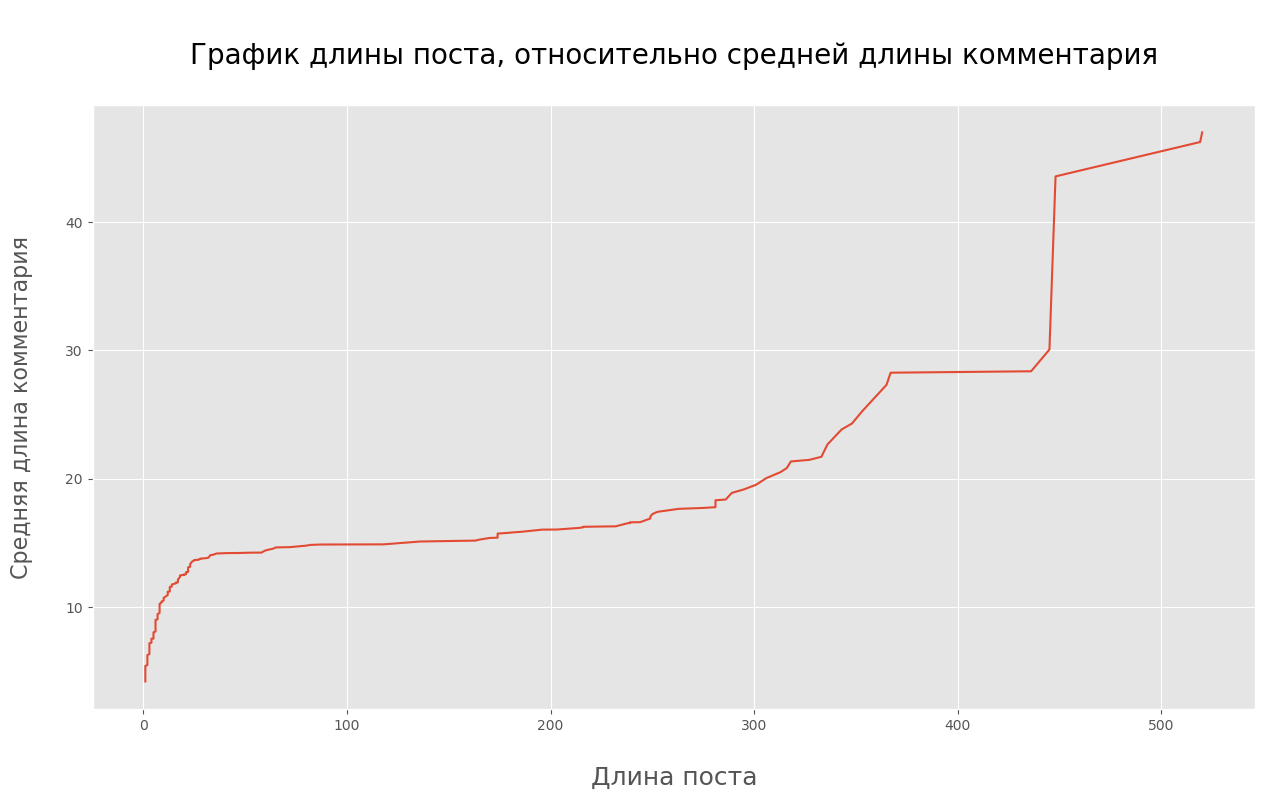

In [19]:
    style.use('ggplot')
    colors = sns.color_palette('viridis')
    plt.figure(figsize=(15, 8), dpi=100)
    colors = sns.color_palette('viridis', max([13]))
    post_len.sort()
    comment_len.sort()
    plt.plot(post_len, comment_len)
    plt.title('\nГрафик длины поста, относительно средней '
              'длины комментария\n', fontsize=20)
    plt.ylabel('Средняя длина комментария\n', fontsize=16)
    plt.xlabel('\nДлина поста', fontsize=18)
    plt.show()

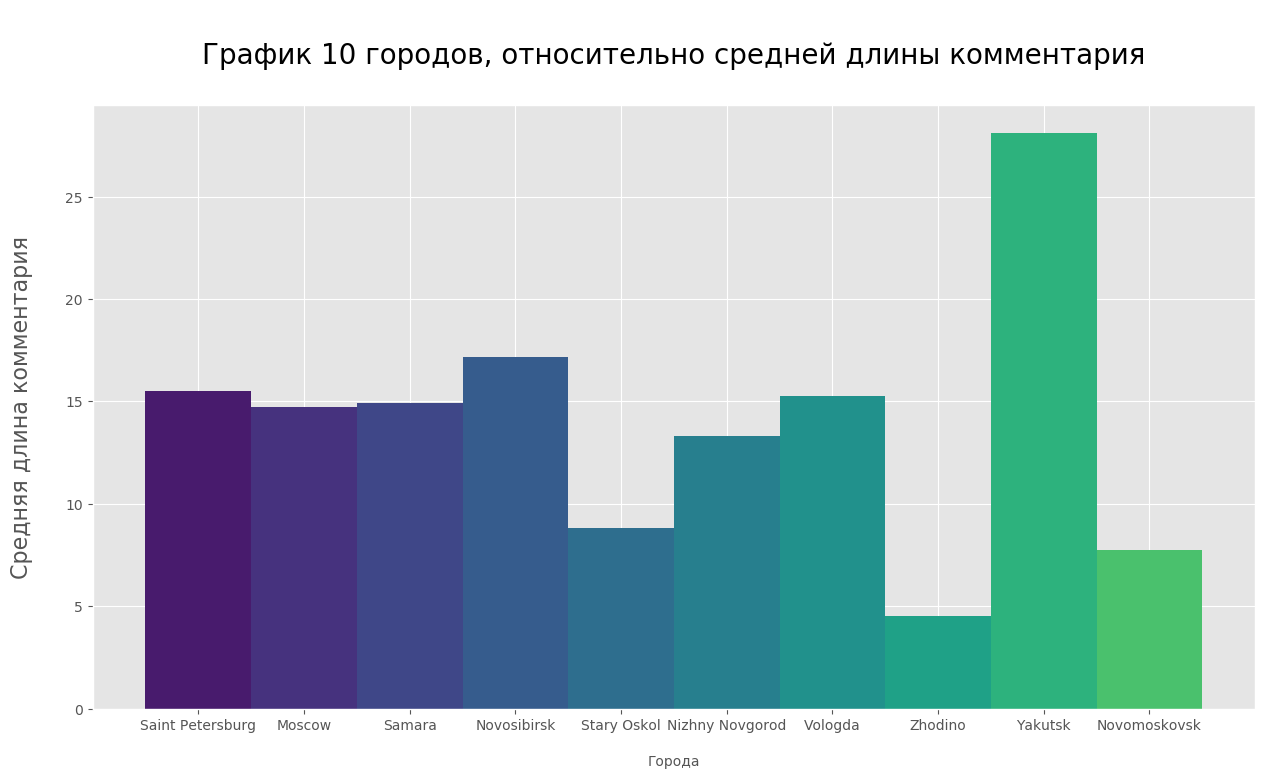

In [21]:
    city_comments = {}
    for d in city_and_len:
        for k in d.keys():
            city_comments[k] = city_comments.get(k, 0) + d[k]
    
        city_comments_count = {}
    for d in city_and_len:
        for k in d.keys():
            city_comments_count[k] = city_comments_count.get(k, 0) + 1
    
    cities = []
    av_cities = []
    for key, value in city_comments.items():
        cities.append(key)
        av_cities.append(value/city_comments_count[key])
    
    
    
    colors = sns.color_palette('viridis')
    plt.figure(figsize=(15, 8), dpi=100)
    colors = sns.color_palette('viridis', max([13]))
    plt.bar(cities[:10], av_cities[:10], color=colors, width=1)
    plt.title('\nГрафик 10 городов, относительно средней '
              'длины комментария\n', fontsize=20)
    plt.ylabel('Средняя длина комментария\n', fontsize=16)
    plt.xlabel('\nГорода', fontsize=10)
    plt.show()

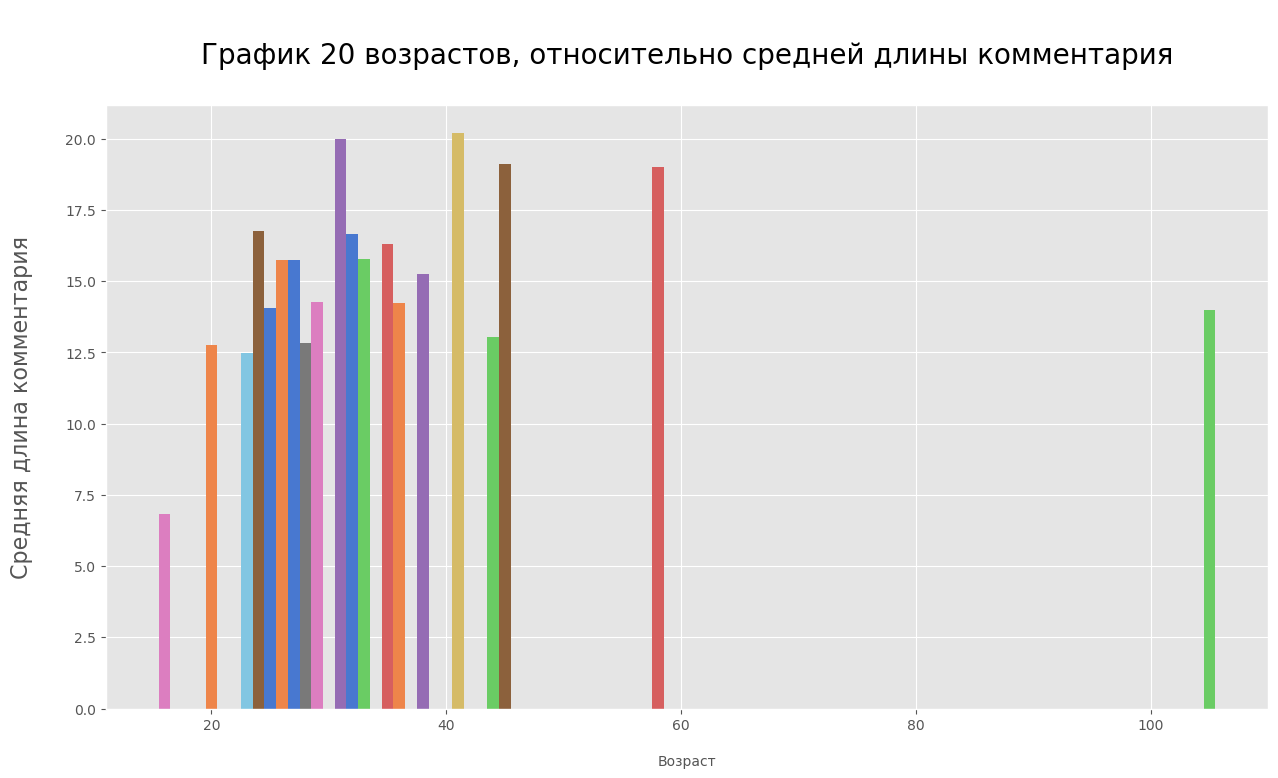

In [41]:
    age_comments = {}
    for d in age_and_len:
        for k in d.keys():
            age_comments[k] = age_comments.get(k, 0) + d[k]

    age_comments_count = {}
    for d in age_and_len:
        for k in d.keys():
            age_comments_count[k] = age_comments_count.get(k, 0) + 1

    ages = []
    av_ages = []
    for key, value in age_comments.items():
        ages.append(key)
        av_ages.append(value/age_comments_count[key])


    style.use('ggplot')
    plt.figure(figsize=(15, 8), dpi=100)
    colors = sns.color_palette('muted', max([13]))
    plt.bar(ages[:20], av_ages[:20], color=colors, width=1)
    plt.title('\nГрафик 20 возрастов, относительно '
              'средней длины комментария\n', fontsize=20)
    plt.ylabel('Средняя длина комментария\n', fontsize=16)
    plt.xlabel('\nВозраст', fontsize=10)
    plt.show()

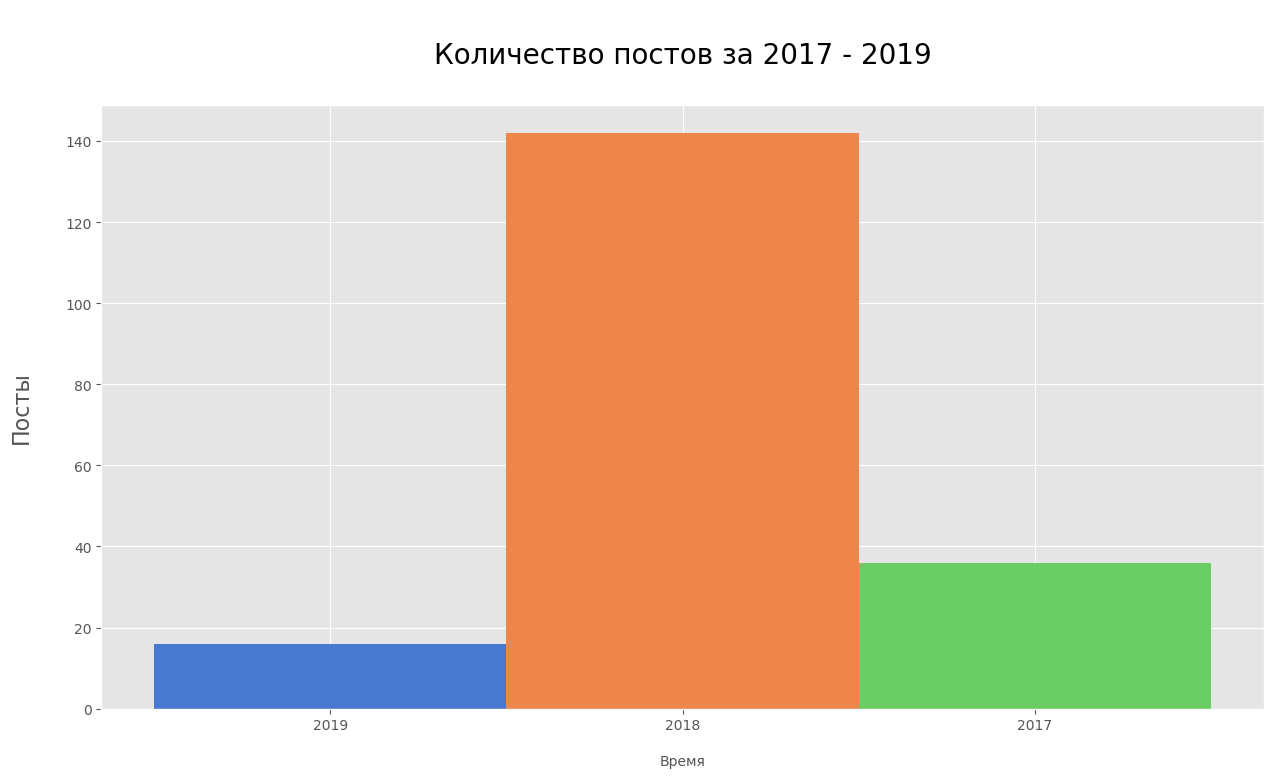

In [43]:
    plt.figure(figsize=(15, 8), dpi=100)
    colors = sns.color_palette('muted', max([13]))
    plt.bar(posts_count_time.keys(), posts_count_time.values(),
            color=colors, width=1)
    plt.title('\nКоличество постов за 2017 - 2019\n', fontsize=20)
    plt.ylabel('Посты\n', fontsize=16)
    plt.xlabel('\nВремя', fontsize=10)
    plt.show()

In [44]:
    with open('korpus.txt', 'w', encoding="utf-8") as file:
        for post in data:
            file.write(post['text'] + '\n\n')
            for coms in post['comments']:
                file.write(coms['text'] + '\n')
            file.write(coms['text'] + '\n\n\n\n')